In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [207]:
loan_data = pd.read_csv("loan.csv")

In [208]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [209]:
loan_data.shape

(39717, 111)

In [210]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

**From above result it is known that there are serveral columns has all null values, it is safer to remove those columns**  

In [211]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


**Now find out uniqueness of each column, so that we can safely remove single valued columns**

In [212]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

**From above result we found that there are several single values column which will be not usefull for analysis, so we can drop those columns.**

In [213]:
loan_data = loan_data.loc[:,loan_data.apply(pd.Series.nunique) != 1]
loan_data.shape

(39717, 48)

### Now we have to to review remaining columns to filter out uwanted columns which will not be usefull for our analysis

- Columns [addr_state, desc, emp_title, id, member_id, title, url, zip_code] will not be usefull for analysis.
- Investor specific data such as [out_prncp_inv, total_pymnt_inv] are not needed for our analysis.
- Statistical data like [collection_recovery_fee, delinq_2yrs, last_credit_pull_d, last_pymnt_amnt, last_pymnt_d, mths_since_last_delinq, mths_since_last_record, next_pymnt_d, out_prncp, pub_rec_bankruptcies, recoveries, revol_bal, total_pymnt, total_rec_int, total_rec_late_fee, total_rec_prncp] can be dropped.


In [214]:
loan_data.drop(['addr_state', 'desc', 'emp_title', 'id', 'member_id', 'url', 'zip_code', 'out_prncp_inv', 'total_pymnt_inv', 'collection_recovery_fee', 'delinq_2yrs', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'out_prncp', 'pub_rec_bankruptcies', 'recoveries', 'revol_bal', 'title', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp'], axis = 1, inplace = True)

In [215]:
loan_data.shape

(39717, 22)

### We want to analys the data based on column loan_status

In [216]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

### Based on these value counts, we can eliminate "Current" status loans as this will not give any value in our analysis

In [217]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

### Now we have all the column required for our analysis, now we will have to check missing values

In [218]:
loan_data.isnull().sum()


loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

### From above result we can see that columns emp_length and revol_util has missing values

In [219]:
print('emp_lenth Missing Values Percentage: ', (loan_data['emp_length'].isnull().sum()/len(loan_data['emp_length']))*100)
print('revol_util Missing Values Percentage: ', (loan_data['revol_util'].isnull().sum()/len(loan_data['revol_util']))*100)


emp_lenth Missing Values Percentage:  2.6777613603960906
revol_util Missing Values Percentage:  0.12961090805402184


### From above result we can decide following actions
- For column emp_length we can impute value by analysing further.
- For column revol_util all the rows with missing value can be safely removed as the percentage is way lower.

In [220]:
print(loan_data['emp_length'].mode())

loan_data['emp_length'].value_counts()

0    10+ years
Name: emp_length, dtype: object


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### From above result we can see the mode value has higher frequency than the next value, so we can replace missing values with mode value.

In [221]:
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace = True)
loan_data['emp_length'].isna().sum()

0

### Column revol_util does not have predictable sequence and missing values are very low in percentage, so we can drop those rows safely.

In [222]:
loan_data.dropna(axis=0, subset = ['revol_util'], inplace = True)
loan_data['revol_util'].isna().sum()

0

### Now we will have to standardise the data, based on our EDA we can assume following points
- Columns revol_util and int_rate are numeric but described as object. So we can remove % symbol and covert to numeric
- emp_length also numeric, but for fewer cases to it requires sepcial handling for few values.
    - For < 1 year is can be replaced with 0
    - For 10+ years can be replaced with 10
- Column term can be changed to category type.
- Column sub_grade can be converted to numeric value by taking right most character
- Column home_ownership can be standardised by replacing NONE with value OTHER

In [223]:
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '').astype('float')
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype('float')

In [224]:
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])).astype('int64')

In [225]:
loan_data['sub_grade'] = loan_data['sub_grade'].apply(lambda x: x[1:]).astype('int64')

In [226]:
loan_data['home_ownership'] = loan_data['home_ownership'].apply(lambda x: 'OTHER' if x == 'NONE' else x)

In [227]:
# convert term to numeric by replacing month with '' and trim white space and convert to int
loan_data['term'] = loan_data['term'].apply(lambda x: x.replace('months', '').strip()).astype('int64')

### Now we have to handle the outlier values for the columns annual_inc, dti, loan_amnt, funded_amnt_inv


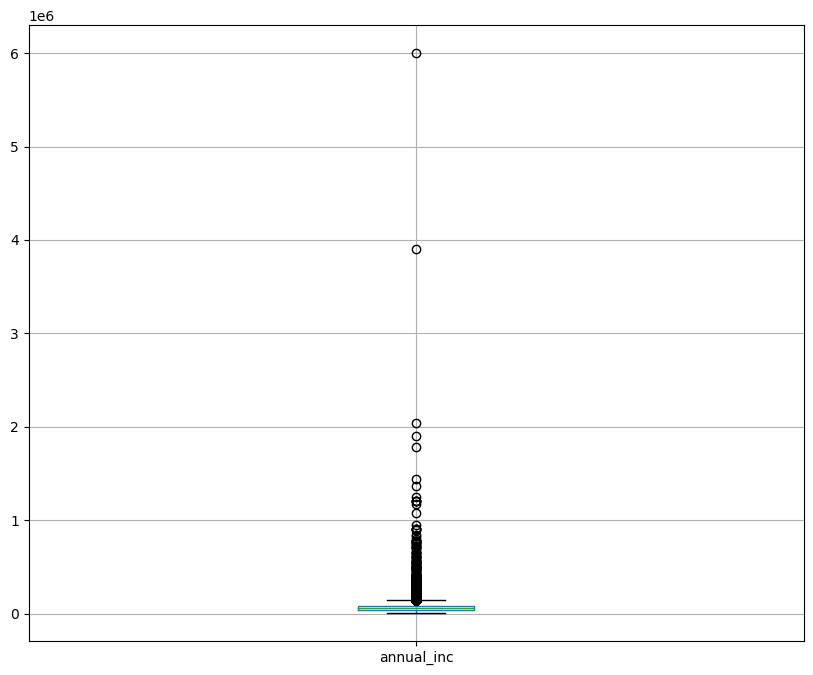

In [228]:
plt.figure(figsize=(10, 8))
loan_data.boxplot(column='annual_inc')
plt.show()

### From above boxblot we can clearly see that there are several outliers, to elimiate we need to see the quantile info 

In [229]:
annual_inc_quantile = loan_data['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
annual_inc_quantile

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

### From above result we can see that after 95th percentile the data is disconnected from the general distribution. So we can take 95th precentile for outlier removal.

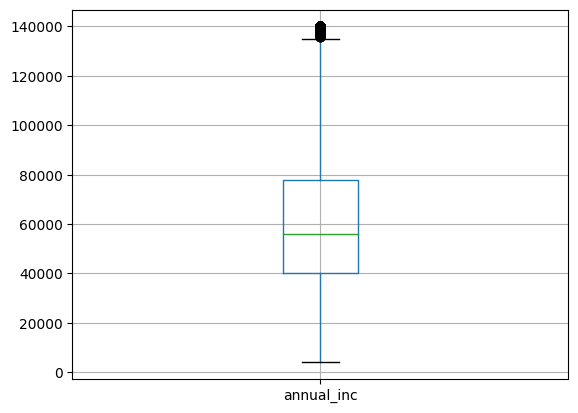

In [230]:
annual_inc_95_percentile = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data['annual_inc'] <= annual_inc_95_percentile]

loan_data.boxplot(column='annual_inc')
plt.show()


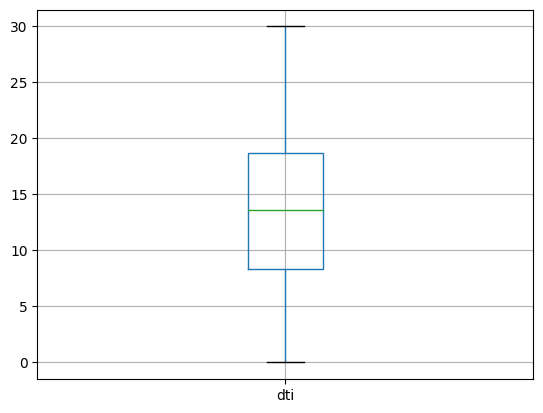

In [231]:
loan_data.boxplot(column='dti')
plt.show()

### From above plot we can see that there is no outlier in column dti

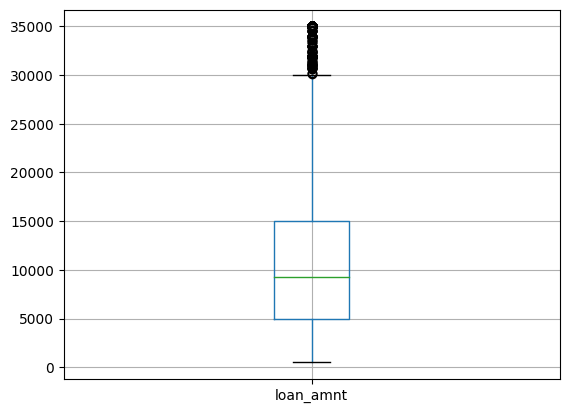

In [232]:
loan_data.boxplot(column='loan_amnt')
plt.show()

In [233]:
loan_data['loan_amnt'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

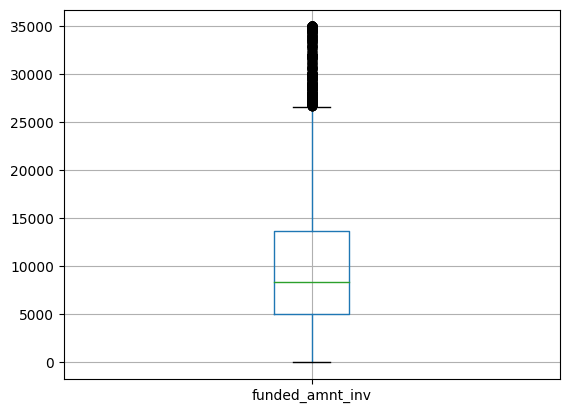

In [234]:
loan_data.boxplot(column='funded_amnt_inv')
plt.show()

In [235]:
loan_data['funded_amnt_inv'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     8396.342174
0.75    13649.999283
0.90    19750.000000
0.95    23949.287805
0.97    24975.000000
0.98    27953.287538
0.99    31966.803281
Name: funded_amnt_inv, dtype: float64

### From above results, we can see that there are few values far from general distribution. But those values are seems to be contineous so no need for removal

### Now we have to work on derived variable to assist our analysis
- issue_d can be splitted into issue_month and issue_year
- int_rate can be put into bins by '5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'
- annual_inc can be put into bins by '3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'
- open_acc can be put into bins by '2-10','10-19','19-27','27-36','36-44'
- revol_util can be put into bins by '0-20','20-40','40-60','60-80','80-100'
- dit can be into bins by '0-6','6-12','12-18','18-24','24-30'

In [236]:
loan_data['issue_year'] = loan_data['issue_d'].apply(lambda x: '20'+x.split('-')[1])
loan_data['issue_month'] = loan_data['issue_d'].apply(lambda x: x.split('-')[0])


In [237]:
loan_data['int_rate_bins'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['annual_inc_bins'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data['open_acc_bins'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_bins'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['dti_bins'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

### Now we will have to analyze the data we have
- Analysing data based categorical columns (home_ownership, purpose, grade, subgrade, term)
- Analysing data based on Univariate, Bivariate and Segmented Univariate.


#### First we will analyze loan_status column   

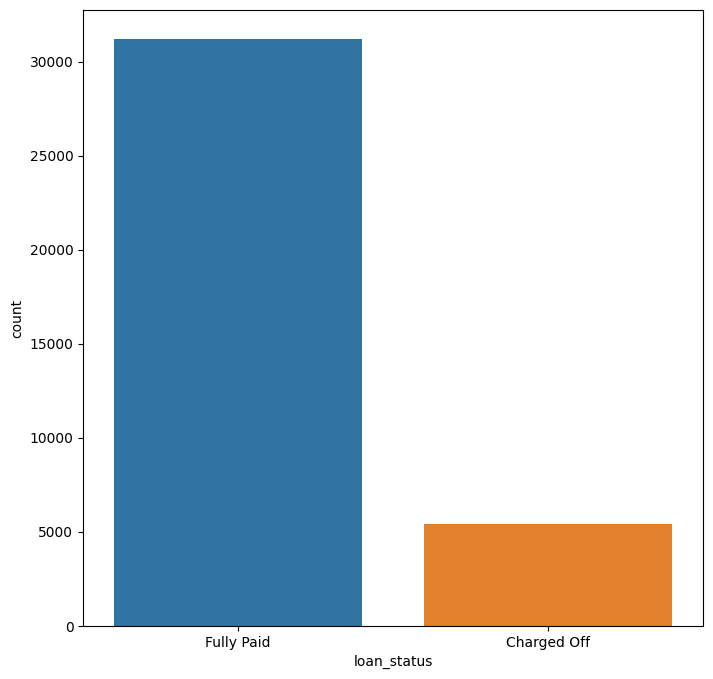

In [238]:
# create a bar of loan_status columns using seaborn
plt.figure(figsize=(8, 8))
sns.countplot(x='loan_status', data=loan_data)
plt.show()


### From above chart we can come to following understandings
- Most of the loans are fully paid.
- 14% of the loans are defaulted.

### Now analyze defaulted loans against home_ownership

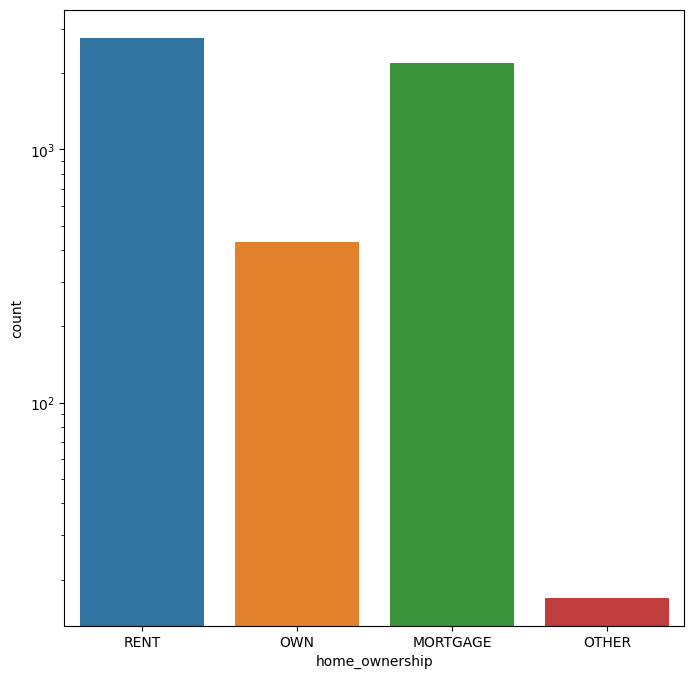

In [239]:
fig, ax= plt.subplots(figsize=(8, 8))
ax.set(yscale="log")
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.show()

### From above plot we can see that home_ownership with value RENT and MORTGATE has higher chance of default against own and other home ownership.

### Now analyze defaulted loans agains purpose

<Axes: xlabel='count', ylabel='purpose'>

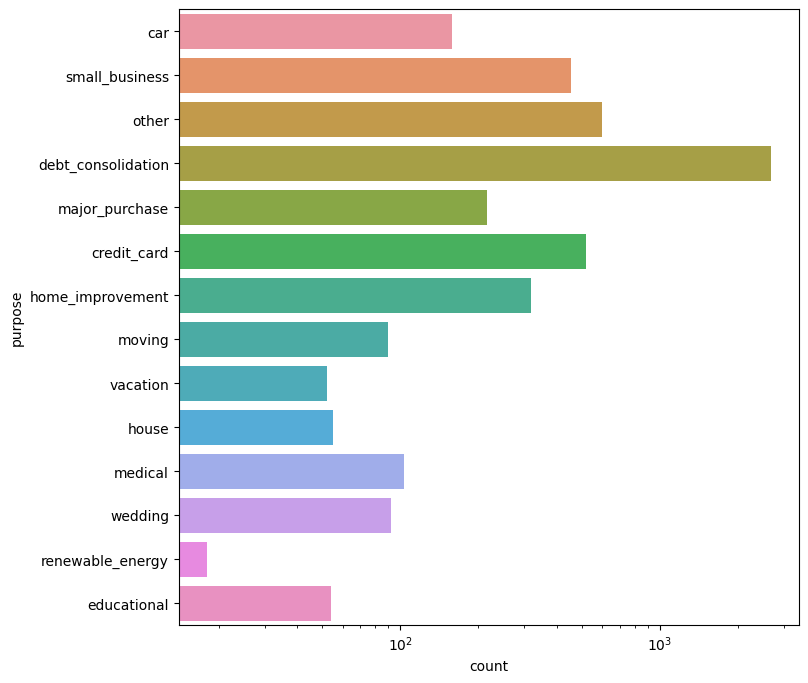

In [240]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

### From above plot we can see that the purpose with value debt_consolidation has higher chance of default.

#### Now we can analyze the defaulted loan against grade of the loans

<Axes: xlabel='grade', ylabel='count'>

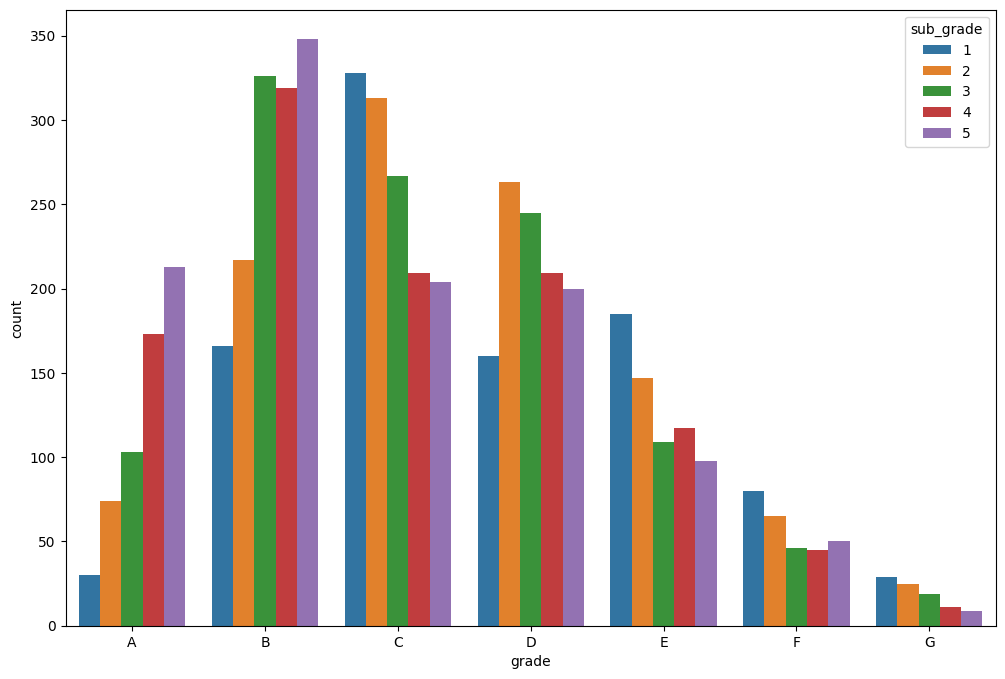

In [241]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

### From above plot we can see that Grade B, C, D and followed by A has most defaults.

### Now we can analyze defaulted loan against emp_length

<Axes: xlabel='emp_length', ylabel='count'>

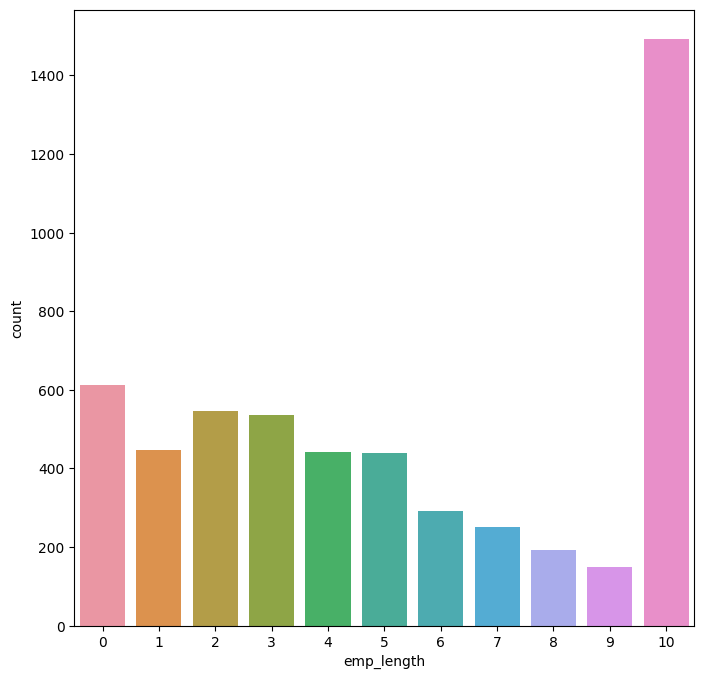

In [242]:
fig, ax = plt.subplots(figsize = (8,8))
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

### From above plot we can see that emp_lenght >=10 has more chance of defaults

### Now we can analyze defaulted loans against various bins we created

<Axes: xlabel='revol_util_bins', ylabel='count'>

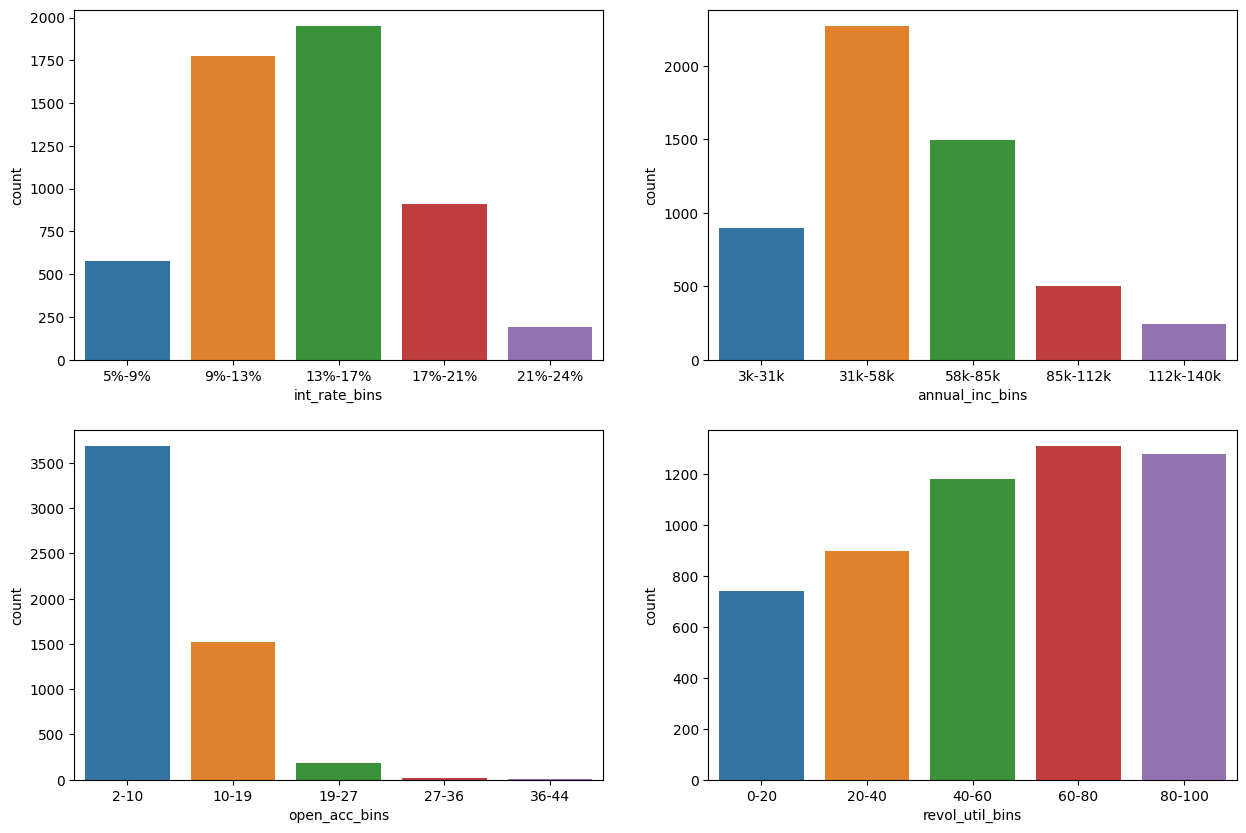

In [243]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_bins', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.subplot(222)
sns.countplot(x='annual_inc_bins', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.subplot(223)
sns.countplot(x='open_acc_bins', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.subplot(224)
sns.countplot(x='revol_util_bins', data=loan_data[loan_data.loan_status == 'Charged Off'])




### From above plots we can observe following
- int_rate range between 9 to 17 has more chances of default
- anual_inc range 31 to 58 has more chances of default
- open_acc range 2 to 10 has more chances of default
- Higher the revol_util range higher the changes of default

### Now we can analyze defaulted loans agains term

<Axes: xlabel='term', ylabel='count'>

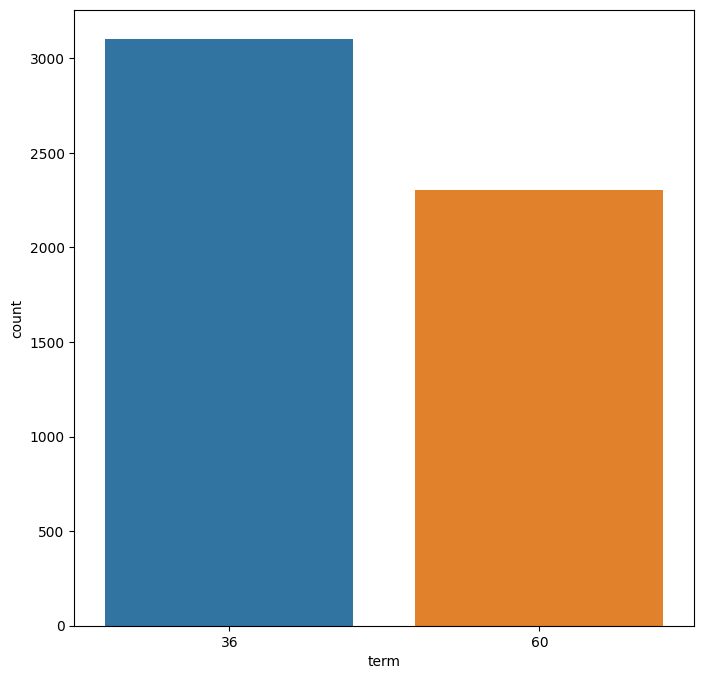

In [244]:
fig, ax = plt.subplots(figsize = (8,8))
sns.countplot(x='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

### From above plot we can see that term with 36 months has more chance for default.

<Axes: xlabel='issue_month', ylabel='count'>

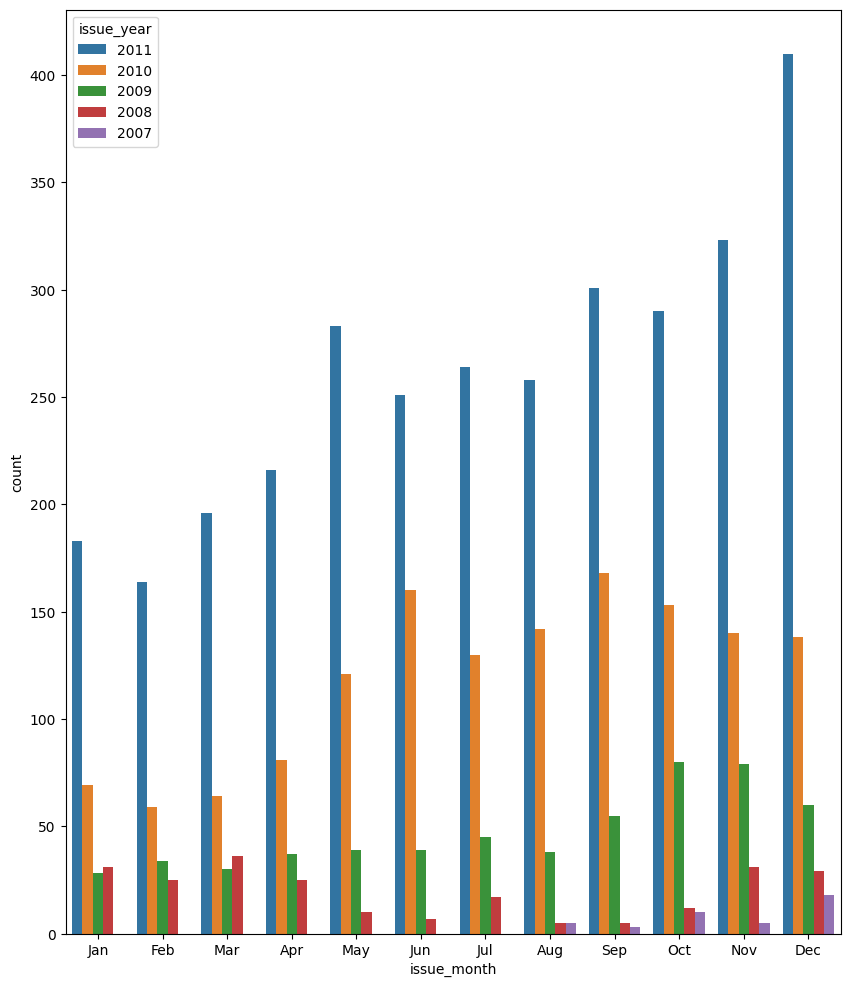

In [245]:
fig, ax = plt.subplots(figsize = (10, 12))
sns.countplot(x='issue_month', hue = 'issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'], order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])


### From above plot we can see that, for the year 2011, the default is higher and peaked in December.

### Now we can analyze default against dti_bins

<Axes: xlabel='dti_bins', ylabel='count'>

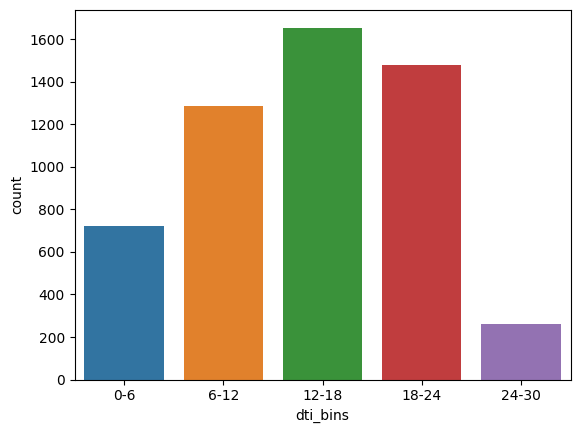

In [246]:
sns.countplot(x='dti_bins', data=loan_data[loan_data['loan_status']=='Charged Off'])

### From above plot we can see that dti range between 6 to 24 has more chances of default.

### Now lets analyze loan_status against various combination of columns
##### annual_inc vs loan_amt

<Axes: xlabel='annual_inc_bins', ylabel='loan_amnt'>

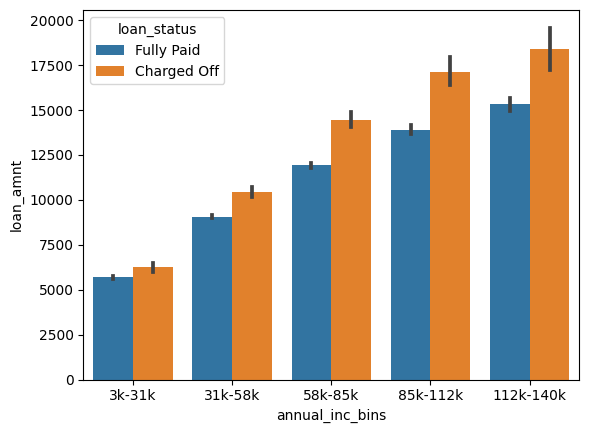

In [247]:
sns.barplot(x = "annual_inc_bins", y = "loan_amnt", hue = 'loan_status', data = loan_data)

### From above plot we can see that higher the loan amount there is a higher chance of default irrespective of annual income.

<Axes: xlabel='loan_amnt', ylabel='purpose'>

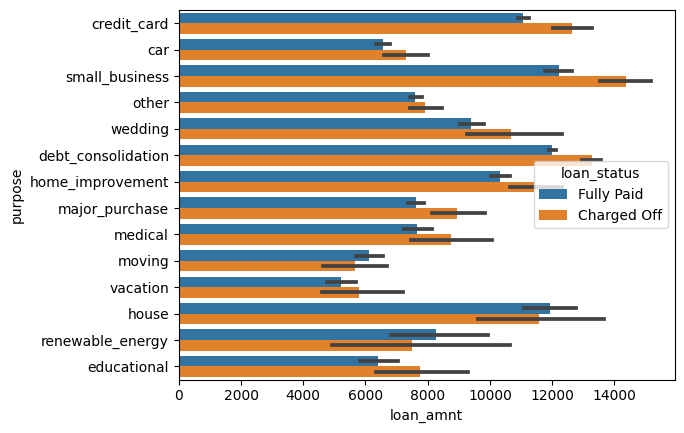

In [248]:
sns.barplot(y = "purpose", x = "loan_amnt", hue = 'loan_status', data = loan_data)

### From above plot we can see that purpose small_business and debt_consolidation has more chances of defaults.

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

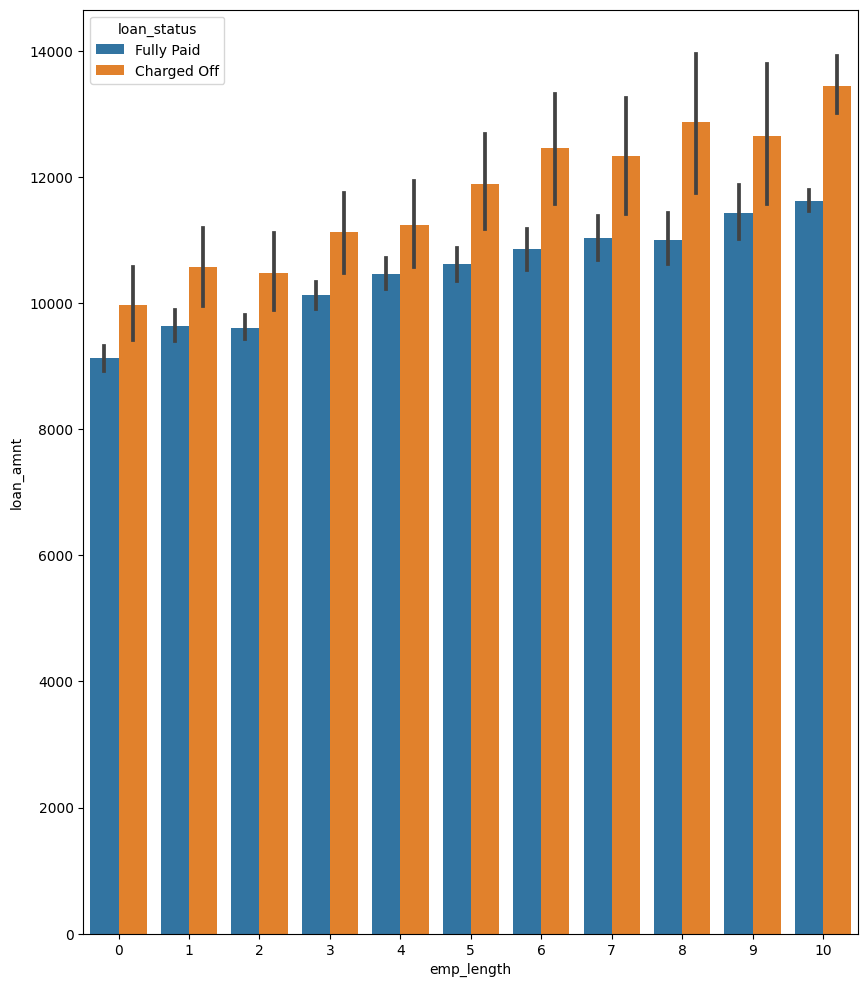

In [249]:
plt.figure(figsize=(10,12))
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status')

### From above plot we can see that higher loan amount is sanctioned for employee with more emp_length, that result in higher default.

<Axes: xlabel='int_rate_bins', ylabel='loan_amnt'>

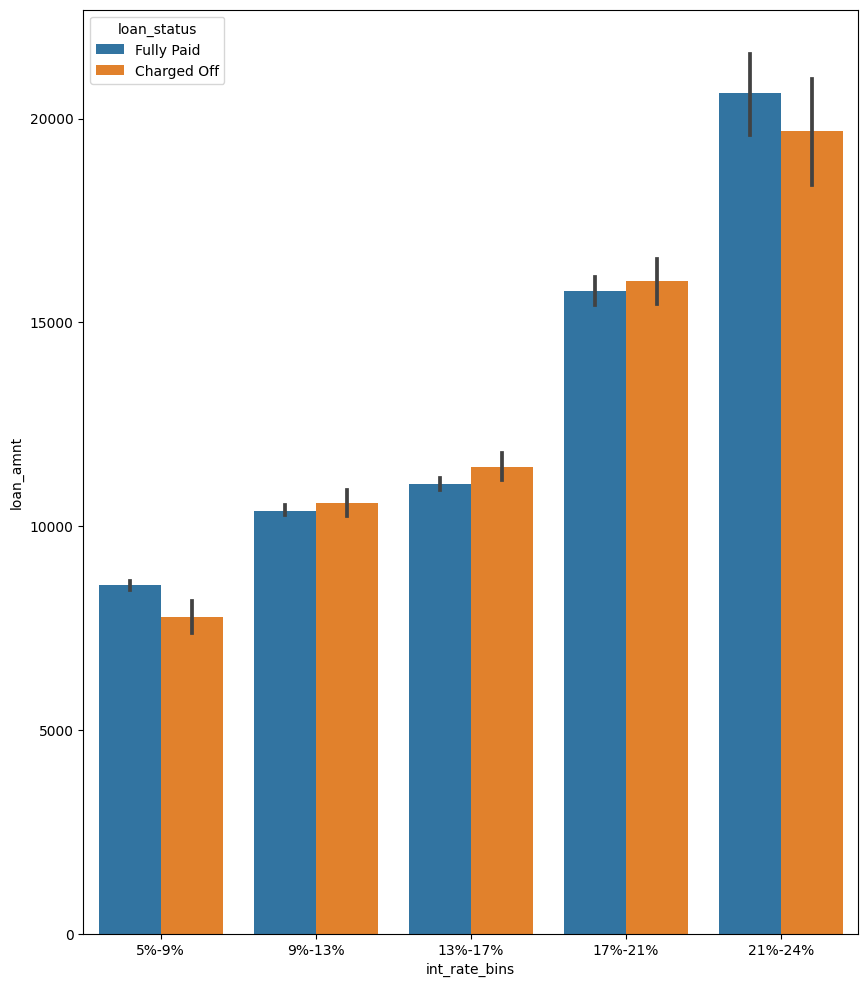

In [250]:
plt.figure(figsize=(10,12))
sns.barplot(data =loan_data,y='loan_amnt', x='int_rate_bins', hue ='loan_status')

### From above plot we can see that higher the int_rate and loan_amnt, higher the chances of default.

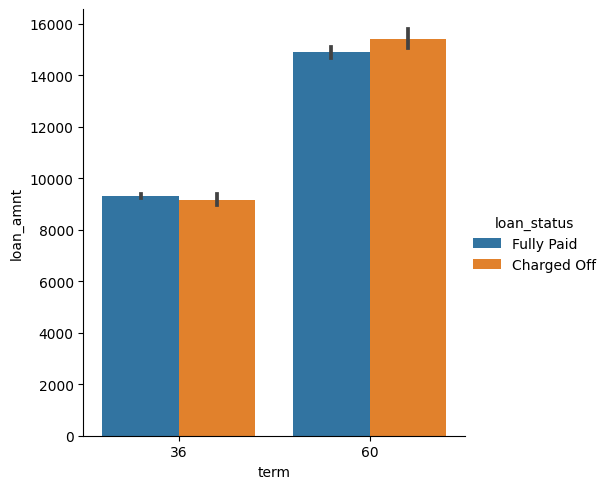

In [251]:
sns.catplot(y = 'loan_amnt', x = 'term', data = loan_data,hue = 'loan_status', kind = 'bar')

### From above plot we can see that the higher term and loan_amt resulted higher defaults.

<Axes: xlabel='grade', ylabel='int_rate'>

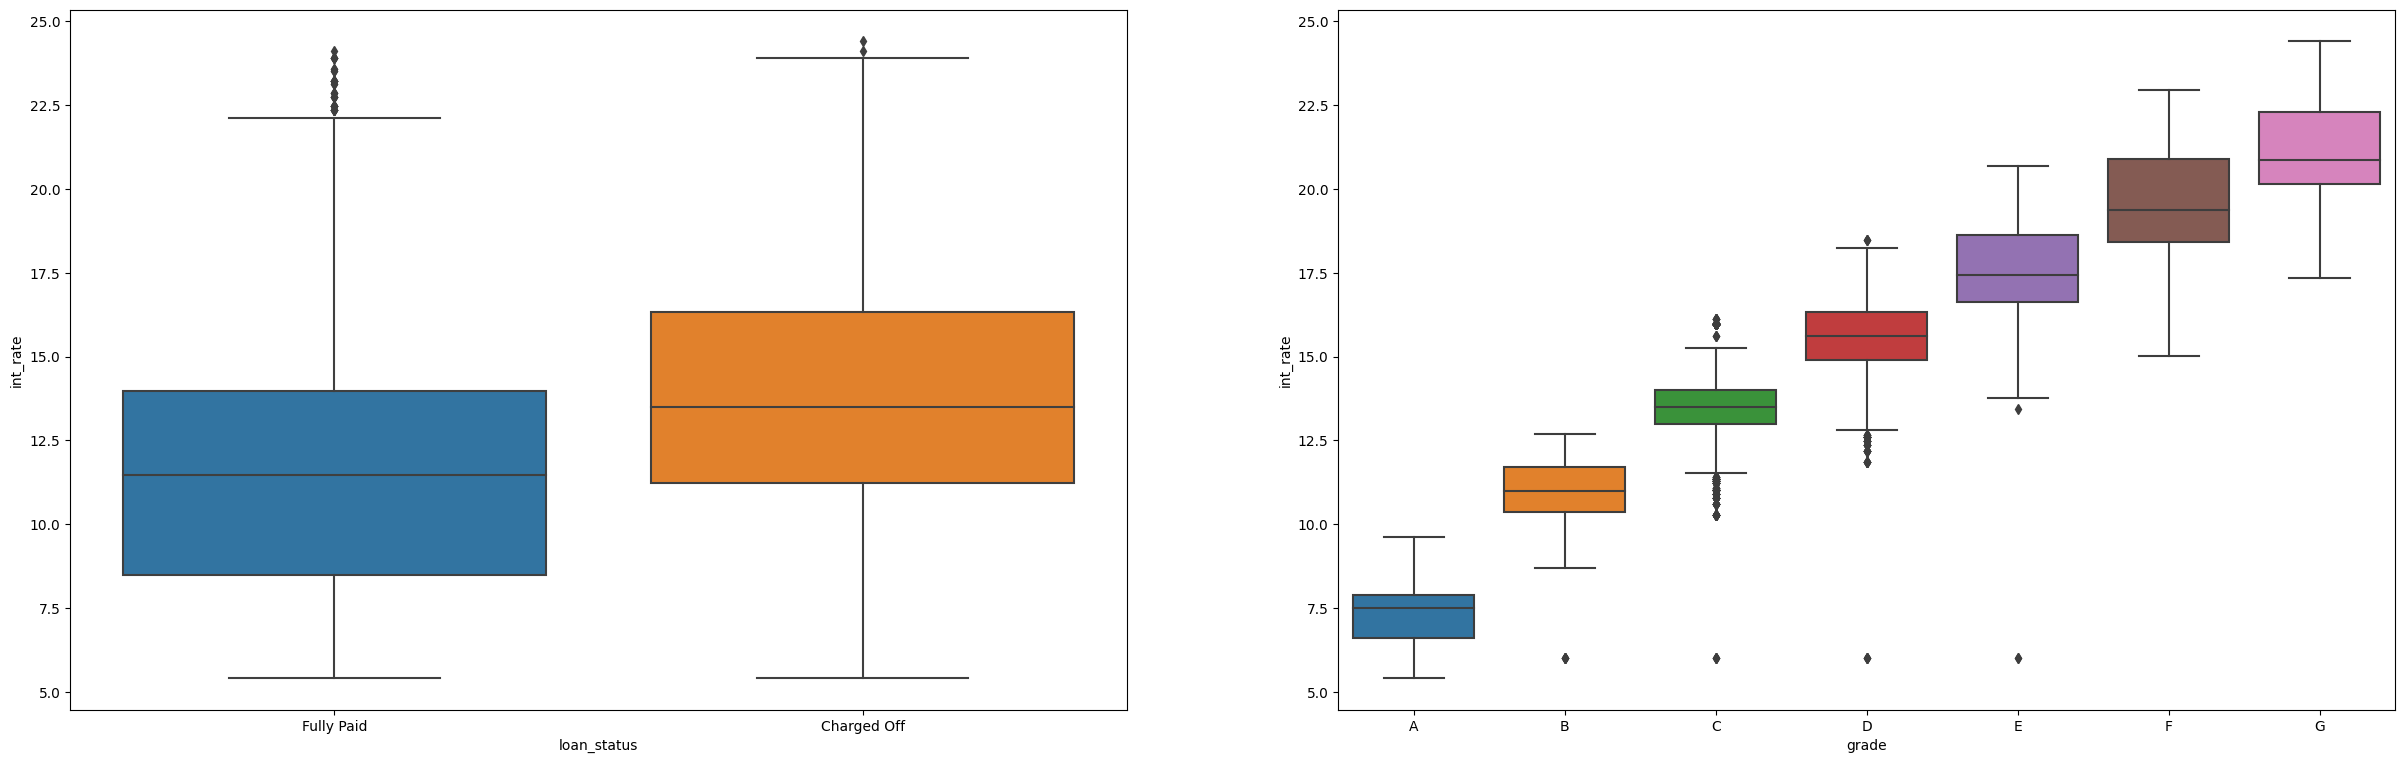

In [252]:
plt.figure(figsize=(30,20))
plt.subplot(221)
sns.boxplot(y='int_rate', x='loan_status', data=loan_data)
plt.subplot(222)
sns.boxplot(y='int_rate', x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=loan_data)

### From above plot we can see that lower the grade, higher the int_rate and with higher int_rate has more chance of default

### Following are the conclusions we can take from the analysis
- Purpose debt_consolidation has higher chance of default followed by small_business
- Employee with higher emp_length gets higher loan_amnt, that results in higher defaults
- Higher loan_amnt and int_rate results in higher defaults
- Higher loan_amnt and term results in higher defaults.
- Lower graded loans has higher interest rates, with higher interest rate has higher chance of defaults.
